#### 건강데이터 정보

1. 성별 코드 : 1 남자 / 2 여자


2. 연령대 : 20세 부터 5살 단위로 1씩 증가
 * 20세 : 4
 * 25세 : 5 
 * 30세 : 6
 * 35세 : 7 ...


3. 시도 코드 : 해당 검진자 거주지 시도 코드
 * 11 서울특별시
 * 26 부산광역시
 * 27 대구광역시
 * 28 인천광역시
 * 29 광주광역시
 * 30 대전광역시
 * 31 울산광역시
 * 36 세종특별자치시
 * 41 경기도
 * 42 강원도
 * 43 충북
 * 44 충남
 * 45 전북
 * 46 전남
 * 47 경북
 * 48 경남
 * 49 제주특별시


4. 청력(좌) / 청력(우) : 1 정상 / 2 비정상


5. 흡연상태 : 1 비흡연 / 2 이전에 흡연했으나 현재는 비흡연 / 3 현재 흡연

## 세포 이미지 데이터

In [1]:
import pandas as pd
import numpy as np

In [2]:
cell_image = pd.read_csv("/home/pirl/Desktop/cell_img.csv")
cell_image.head()

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID,Inspection equipment,Hosp
0,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.1328,0.19800,0.1043,...,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1589,DSA-1,BDS_flu
1,843786,M,12.45,82.57,477.1,15.70,0.13,0.1700,0.15780,0.0809,...,0.8902,0.0075,0.0335,0.0367,0.0114,0.0217,0.0051,2406,DSA-2,BDS_flu
2,84458202,M,13.71,90.20,577.9,20.83,0.12,0.1645,0.09366,0.0599,...,1.3770,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,6991,DSA-3,BDS_flu
3,84501001,M,12.46,83.97,475.9,24.04,0.12,0.2396,0.22730,0.0854,...,1.5990,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,20622,DSA-4,BDS_flu
4,84799002,M,14.54,96.73,658.8,27.54,0.11,0.1595,0.16390,0.0736,...,1.0330,0.0056,0.0424,0.0474,0.0109,0.0186,0.0055,24488,F-1,BDS_flu


In [3]:
cell_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 35 columns):
Image ID                247 non-null int64
Diagnosis               247 non-null object
Mean Radius             247 non-null float64
Mean Perimeter          241 non-null float64
Mean Area               247 non-null float64
Mean Texture            243 non-null float64
Mean Smoothness         247 non-null float64
Mean Compactness        241 non-null float64
Mean Concavity          247 non-null float64
Mean Concave Points     245 non-null float64
Mean Symmetry           246 non-null float64
Mean Fractal Dim        247 non-null float64
Max Radius              247 non-null float64
Max Perimeter           247 non-null float64
Max Area                247 non-null float64
Max Texture             247 non-null float64
Max Smoothness          247 non-null float64
Max Compactness         247 non-null float64
Max Concavity           247 non-null float64
Max Concave Points      247 non-null float6

In [4]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          6
Mean Area               0
Mean Texture            4
Mean Smoothness         0
Mean Compactness        6
Mean Concavity          0
Mean Concave Points     2
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

In [5]:
cell_image.shape

(247, 35)

In [6]:
cell_image.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Diagnosis               2
Inspection equipment    6
Hosp                    1
dtype: int64

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(14,6)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


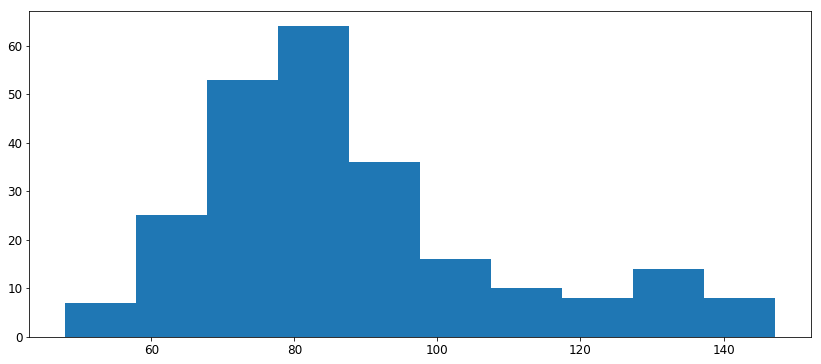

In [9]:
plt.hist(cell_image['Mean Perimeter'])
plt.show()

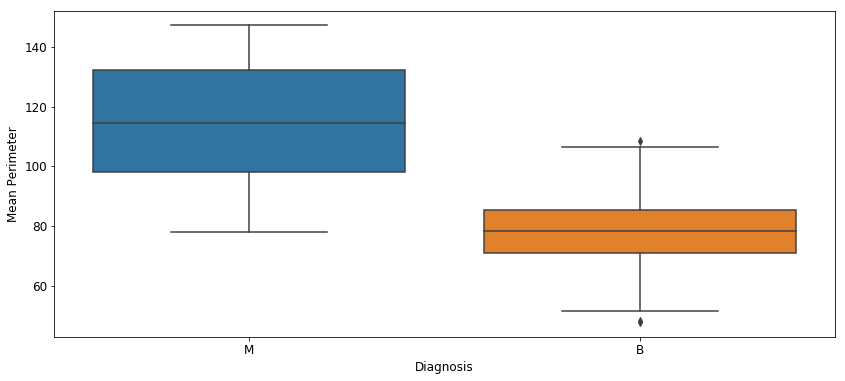

In [10]:
sns.boxplot(data=cell_image,x='Diagnosis',y='Mean Perimeter')

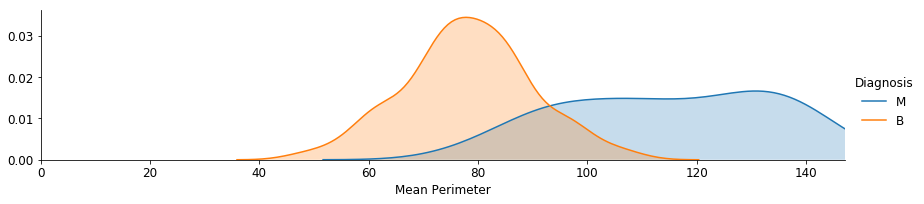

In [11]:
meanperimeter = sns.FacetGrid(cell_image, hue="Diagnosis", aspect=4)
meanperimeter.map(sns.kdeplot, 'Mean Perimeter', shade=True)
meanperimeter.set(xlim=(0, cell_image['Mean Perimeter'].max()))
meanperimeter.add_legend()

plt.show()

In [12]:
cell_image['Mean Perimeter'].describe()

count    241.000000
mean      87.685062
std       21.300849
min       47.920000
25%       73.730000
50%       82.690000
75%       96.730000
max      147.200000
Name: Mean Perimeter, dtype: float64

In [13]:
#Mean Perimeter 결측치 6개
cell_image["Mean Perimeter"].fillna(cell_image.groupby("Diagnosis")["Mean Perimeter"].transform("median"), inplace=True)

In [14]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            4
Mean Smoothness         0
Mean Compactness        6
Mean Concavity          0
Mean Concave Points     2
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

In [15]:
#meancell = cell_image(['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Texture',
#                     'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
#                     'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dim'])

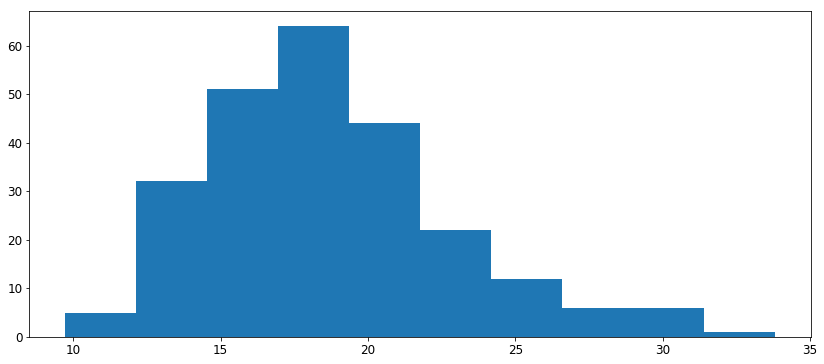

In [16]:
plt.hist(cell_image['Mean Texture'])
plt.show()

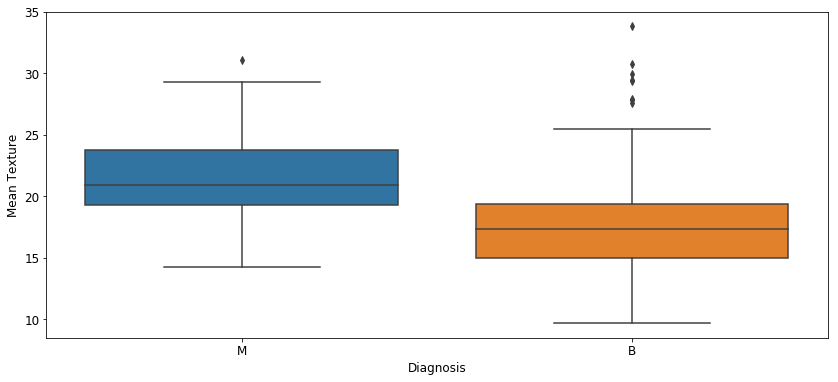

In [17]:
sns.boxplot(data=cell_image,x='Diagnosis',y='Mean Texture')

In [18]:
cell_image.corr()

,Image ID,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID
Image ID,1.000000,0.042095,0.035257,0.053458,0.056435,0.007061,-0.029938,0.001913,0.038394,0.012865,...,0.051688,0.058827,-0.021478,-0.041958,-0.069713,-0.024505,-0.018964,-0.054378,-0.066281,-0.051469
Mean Radius,0.042095,1.000000,0.991007,0.990595,0.289396,0.101616,0.455029,0.592531,0.788064,0.114517,...,0.609354,0.744481,-0.161489,-0.346130,0.090834,0.073741,0.241997,-0.185403,-0.131633,0.565182
Mean Perimeter,0.035257,0.991007,1.000000,0.983294,0.291148,0.132841,0.511022,0.639977,0.819604,0.150147,...,0.629002,0.744337,-0.156000,-0.318102,0.140808,0.109672,0.281424,-0.152320,-0.094435,0.588225
Mean Area,0.053458,0.990595,0.983294,1.000000,0.302100,0.103748,0.450059,0.605721,0.799292,0.126828,...,0.659584,0.798669,-0.133926,-0.298732,0.101619,0.090055,0.251938,-0.157991,-0.106526,0.575334
Mean Texture,0.056435,0.289396,0.291148,0.302100,1.000000,-0.021212,0.236359,0.302269,0.290589,0.115009,...,0.384233,0.339722,0.488019,-0.000267,0.193154,0.101247,0.106379,0.097471,0.027890,0.221711
Mean Smoothness,0.007061,0.101616,0.132841,0.103748,-0.021212,1.000000,0.619933,0.419356,0.499615,0.540969,...,0.240339,0.169079,0.011436,0.393204,0.261440,0.166927,0.370597,0.189425,0.245537,0.190501
Mean Compactness,-0.029938,0.455029,0.511022,0.450059,0.236359,0.619933,1.000000,0.862699,0.807737,0.586454,...,0.551025,0.422206,-0.005459,0.145978,0.725584,0.527060,0.632728,0.217768,0.485984,0.397262
Mean Concavity,0.001913,0.592531,0.639977,0.605721,0.302269,0.419356,0.862699,1.000000,0.886246,0.483544,...,0.633061,0.550863,0.049796,0.067532,0.677144,0.705332,0.707683,0.156345,0.500162,0.481754
Mean Concave Points,0.038394,0.788064,0.819604,0.799292,0.290589,0.499615,0.807737,0.886246,1.000000,0.444550,...,0.704717,0.694576,-0.025192,0.015659,0.449387,0.380512,0.583746,0.053884,0.237894,0.570184
Mean Symmetry,0.012865,0.114517,0.150147,0.126828,0.115009,0.540969,0.586454,0.483544,0.444550,1.000000,...,0.376251,0.253189,0.054704,0.263602,0.450132,0.364803,0.456141,0.465238,0.328164,0.173895


In [19]:
a = cell_image['Mean Texture'].mean()/cell_image['Max Texture'].mean()

In [20]:
#Mean Texture 결측치 4개
cell_image["Mean Texture"].fillna(cell_image["Max Texture"] * a, inplace=True)

In [21]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            0
Mean Smoothness         0
Mean Compactness        6
Mean Concavity          0
Mean Concave Points     2
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

In [22]:
cell_image.head()

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID,Inspection equipment,Hosp
0,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.1328,0.19800,0.1043,...,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1589,DSA-1,BDS_flu
1,843786,M,12.45,82.57,477.1,15.70,0.13,0.1700,0.15780,0.0809,...,0.8902,0.0075,0.0335,0.0367,0.0114,0.0217,0.0051,2406,DSA-2,BDS_flu
2,84458202,M,13.71,90.20,577.9,20.83,0.12,0.1645,0.09366,0.0599,...,1.3770,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,6991,DSA-3,BDS_flu
3,84501001,M,12.46,83.97,475.9,24.04,0.12,0.2396,0.22730,0.0854,...,1.5990,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,20622,DSA-4,BDS_flu
4,84799002,M,14.54,96.73,658.8,27.54,0.11,0.1595,0.16390,0.0736,...,1.0330,0.0056,0.0424,0.0474,0.0109,0.0186,0.0055,24488,F-1,BDS_flu


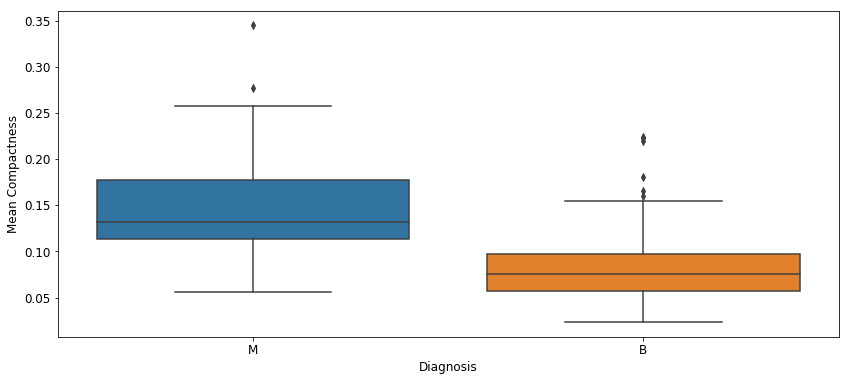

In [23]:
sns.boxplot(data=cell_image,x='Diagnosis',y='Mean Compactness')

In [24]:
cell_image['Mean Compactness'].describe()

count    241.000000
mean       0.098925
std        0.050494
min        0.023440
25%        0.063070
50%        0.085750
75%        0.120900
max        0.345400
Name: Mean Compactness, dtype: float64

In [25]:
b = cell_image['Mean Compactness'].mean()/cell_image['Mean Concavity'].mean()

In [26]:
#Mean Compactness 결측치 6개
cell_image["Mean Compactness"].fillna(cell_image["Mean Concavity"] * b, inplace=True)

In [27]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            0
Mean Smoothness         0
Mean Compactness        0
Mean Concavity          0
Mean Concave Points     2
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

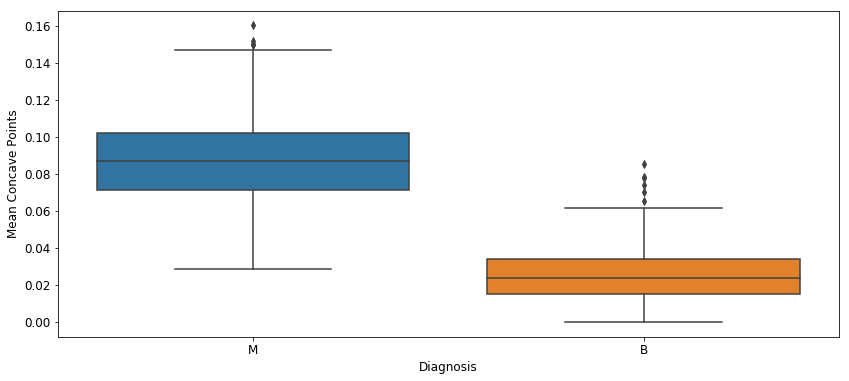

In [28]:
sns.boxplot(data=cell_image,x='Diagnosis',y='Mean Concave Points')

In [29]:
c = cell_image['Mean Concave Points'].mean()/cell_image['Max Concave Points'].mean()

In [32]:
#Mean Concave Points 결측치 2개
cell_image["Mean Concave Points"].fillna(cell_image["Max Concave Points"] * c, inplace=True)

In [33]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            0
Mean Smoothness         0
Mean Compactness        0
Mean Concavity          0
Mean Concave Points     0
Mean Symmetry           1
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64

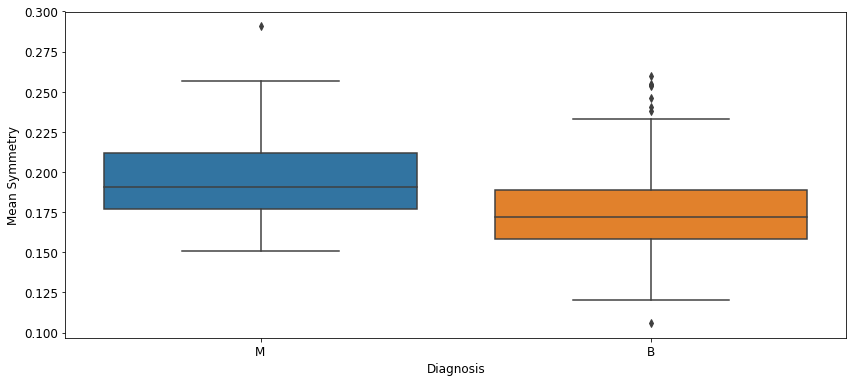

In [34]:
sns.boxplot(data=cell_image,x='Diagnosis',y='Mean Symmetry')

In [35]:
#Mean Symmmetry 결측치 1개
cell_image["Mean Symmetry"].fillna(cell_image.groupby("Diagnosis")["Mean Symmetry"].transform("median"), inplace=True)

In [36]:
cell_image.isnull().sum()

Image ID                0
Diagnosis               0
Mean Radius             0
Mean Perimeter          0
Mean Area               0
Mean Texture            0
Mean Smoothness         0
Mean Compactness        0
Mean Concavity          0
Mean Concave Points     0
Mean Symmetry           0
Mean Fractal Dim        0
Max Radius              0
Max Perimeter           0
Max Area                0
Max Texture             0
Max Smoothness          0
Max Compactness         0
Max Concavity           0
Max Concave Points      0
Max Symmetry            0
Max Fractal Dim         0
SE Radius               0
SE Perimeter            0
SE Area                 0
SE Texture              0
SE Smoothness           0
SE Compactness          0
SE Concavity            0
SE Concave Points       0
SE Symmetry             0
SE Fractal Dim          0
user_ID                 0
Inspection equipment    0
Hosp                    0
dtype: int64